<a href="https://colab.research.google.com/github/dayanamariyathomas/Dayana_portfolio/blob/main/Dayana_thomas_model_selectn_asgnmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;   warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Preprocessing

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include="object").T 

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df.shape

(891, 12)

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
#finding missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
#removing the unnecessary columns
df = df.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
#Extracting the surnames from Name of passengers and replacing it
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df = df.drop(columns='Name')

In [16]:
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')

Data visualisation

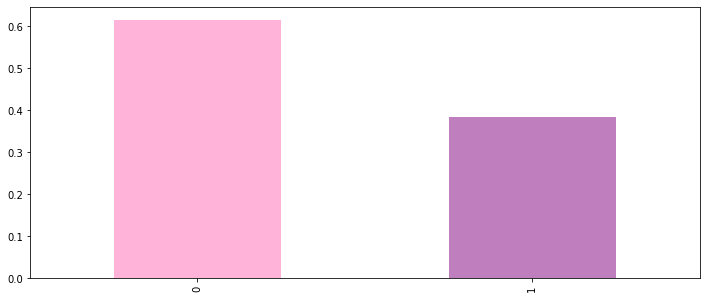

In [17]:
#how many survived or not
plt.figure(figsize=(12,5))
df.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5,color=['hotpink','purple'])
plt.show()

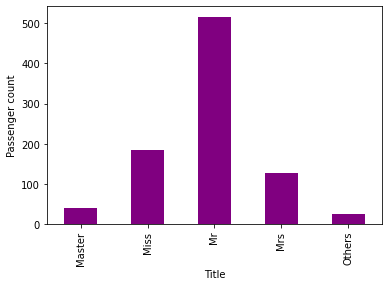

In [18]:
plt = df.Title.value_counts().sort_index()
plt=plt.plot(kind='bar',color='purple')
plt.set(xlabel="Title", ylabel="Passenger count");

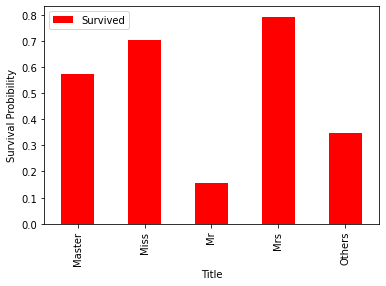

In [19]:
plt =df[['Title', 'Survived']].groupby('Title').mean()
plt=plt.plot(kind='bar',color='red')
plt.set(xlabel="Title", ylabel="Survival Probibility");

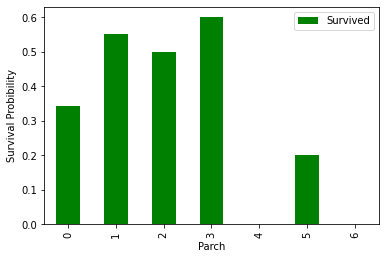

In [20]:
plt =df[['Parch', 'Survived']].groupby('Parch').mean()
plt=plt.plot(kind='bar',color='g')
plt.set(xlabel="Parch", ylabel="Survival Probibility");

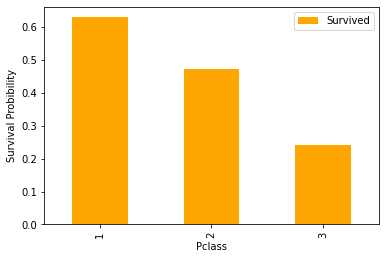

In [21]:
plt =df[['Pclass', 'Survived']].groupby('Pclass').mean()
plt=plt.plot(kind='bar',color='orange')
plt.set(xlabel="Pclass", ylabel="Survival Probibility");

In [22]:
#creating a new column named Familysize by combining sibsp and parch
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1


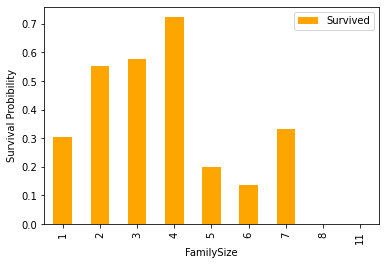

In [23]:
plt =df[['FamilySize', 'Survived']].groupby('FamilySize').mean()
plt=plt.plot(kind='bar',color='orange')
plt.set(xlabel="FamilySize", ylabel="Survival Probibility");

In [24]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
FamilySize,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


In [25]:
#splitting data into categorical and numerical
num_data=df.select_dtypes(include=['int64','float64'])
num_data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
0,0,3,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,2
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,2
4,0,3,35.0,0,0,8.0500,1


In [26]:
cat_data=df.select_dtypes(include=['object'])
cat_data.head()

,Sex,Embarked,Title
0,male,S,Mr
1,female,C,Mrs
2,female,S,Miss
3,female,S,Mrs
4,male,S,Mr


In [27]:
for i,feature in enumerate(cat_data):
    print(df.groupby([feature,'Survived'])['Survived'].count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64
Title   Survived
Master  0            17
        1            23
Miss    0            55
        1           130
Mr      0           436
        1            81
Mrs     0            26
        1           100
Others  0            15
        1             8
Name: Survived, dtype: int64


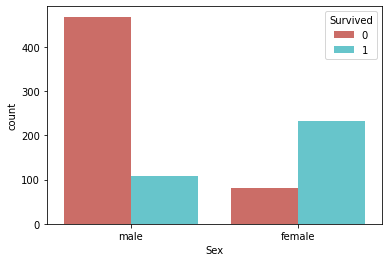

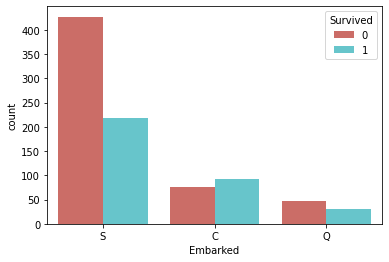

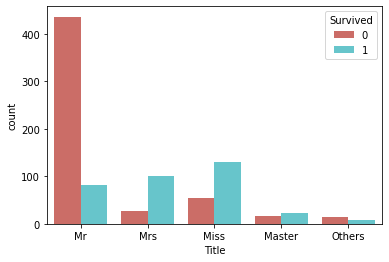

In [28]:
from matplotlib import *
import sys
from pylab import *

for i,feature in enumerate(cat_data):
    plt.figure(i)
    sns.countplot(x=feature,data=df,hue='Survived',palette='hls')

In [29]:
#finding the skewness of some values to detect outliers
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Age:  0.5102446555756495
skewness value of Fare:  4.787316519674893


In [30]:
#from the above value we can understand that the Fare values are rightly skewed and have outliers

In [31]:
#finding the oultier value
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0896

In [32]:
#outlier treatment using flooring and capping
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

[]

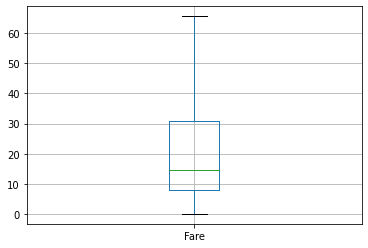

In [33]:
b_plot = df.boxplot(column = 'Fare') 
b_plot.plot()

In [34]:
#replacing the categorical values in the Sex column with numerical
df.Sex =df.Sex.replace({"male": 1, "female" : 0})

Label Encoding

In [35]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

df['Embarked']=le.fit_transform(df['Embarked'])
df['Title']=le.fit_transform(df['Title'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2,2
1,1,1,0,38.0,1,0,65.6344,0,3,2
2,1,3,0,26.0,0,0,7.9250,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,3,2
4,0,3,1,35.0,0,0,8.0500,2,2,1


<Axes: >

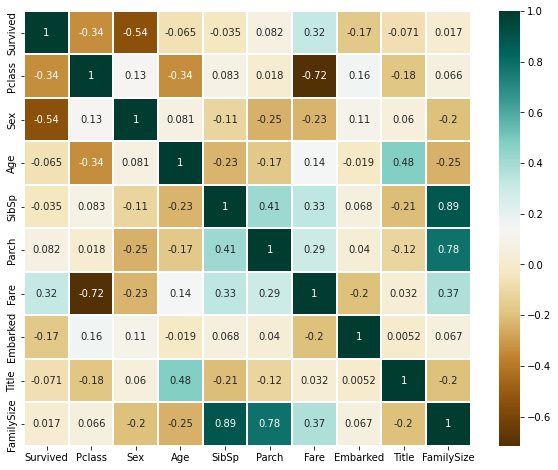

In [37]:
#correlation between the columns
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

Model Selection

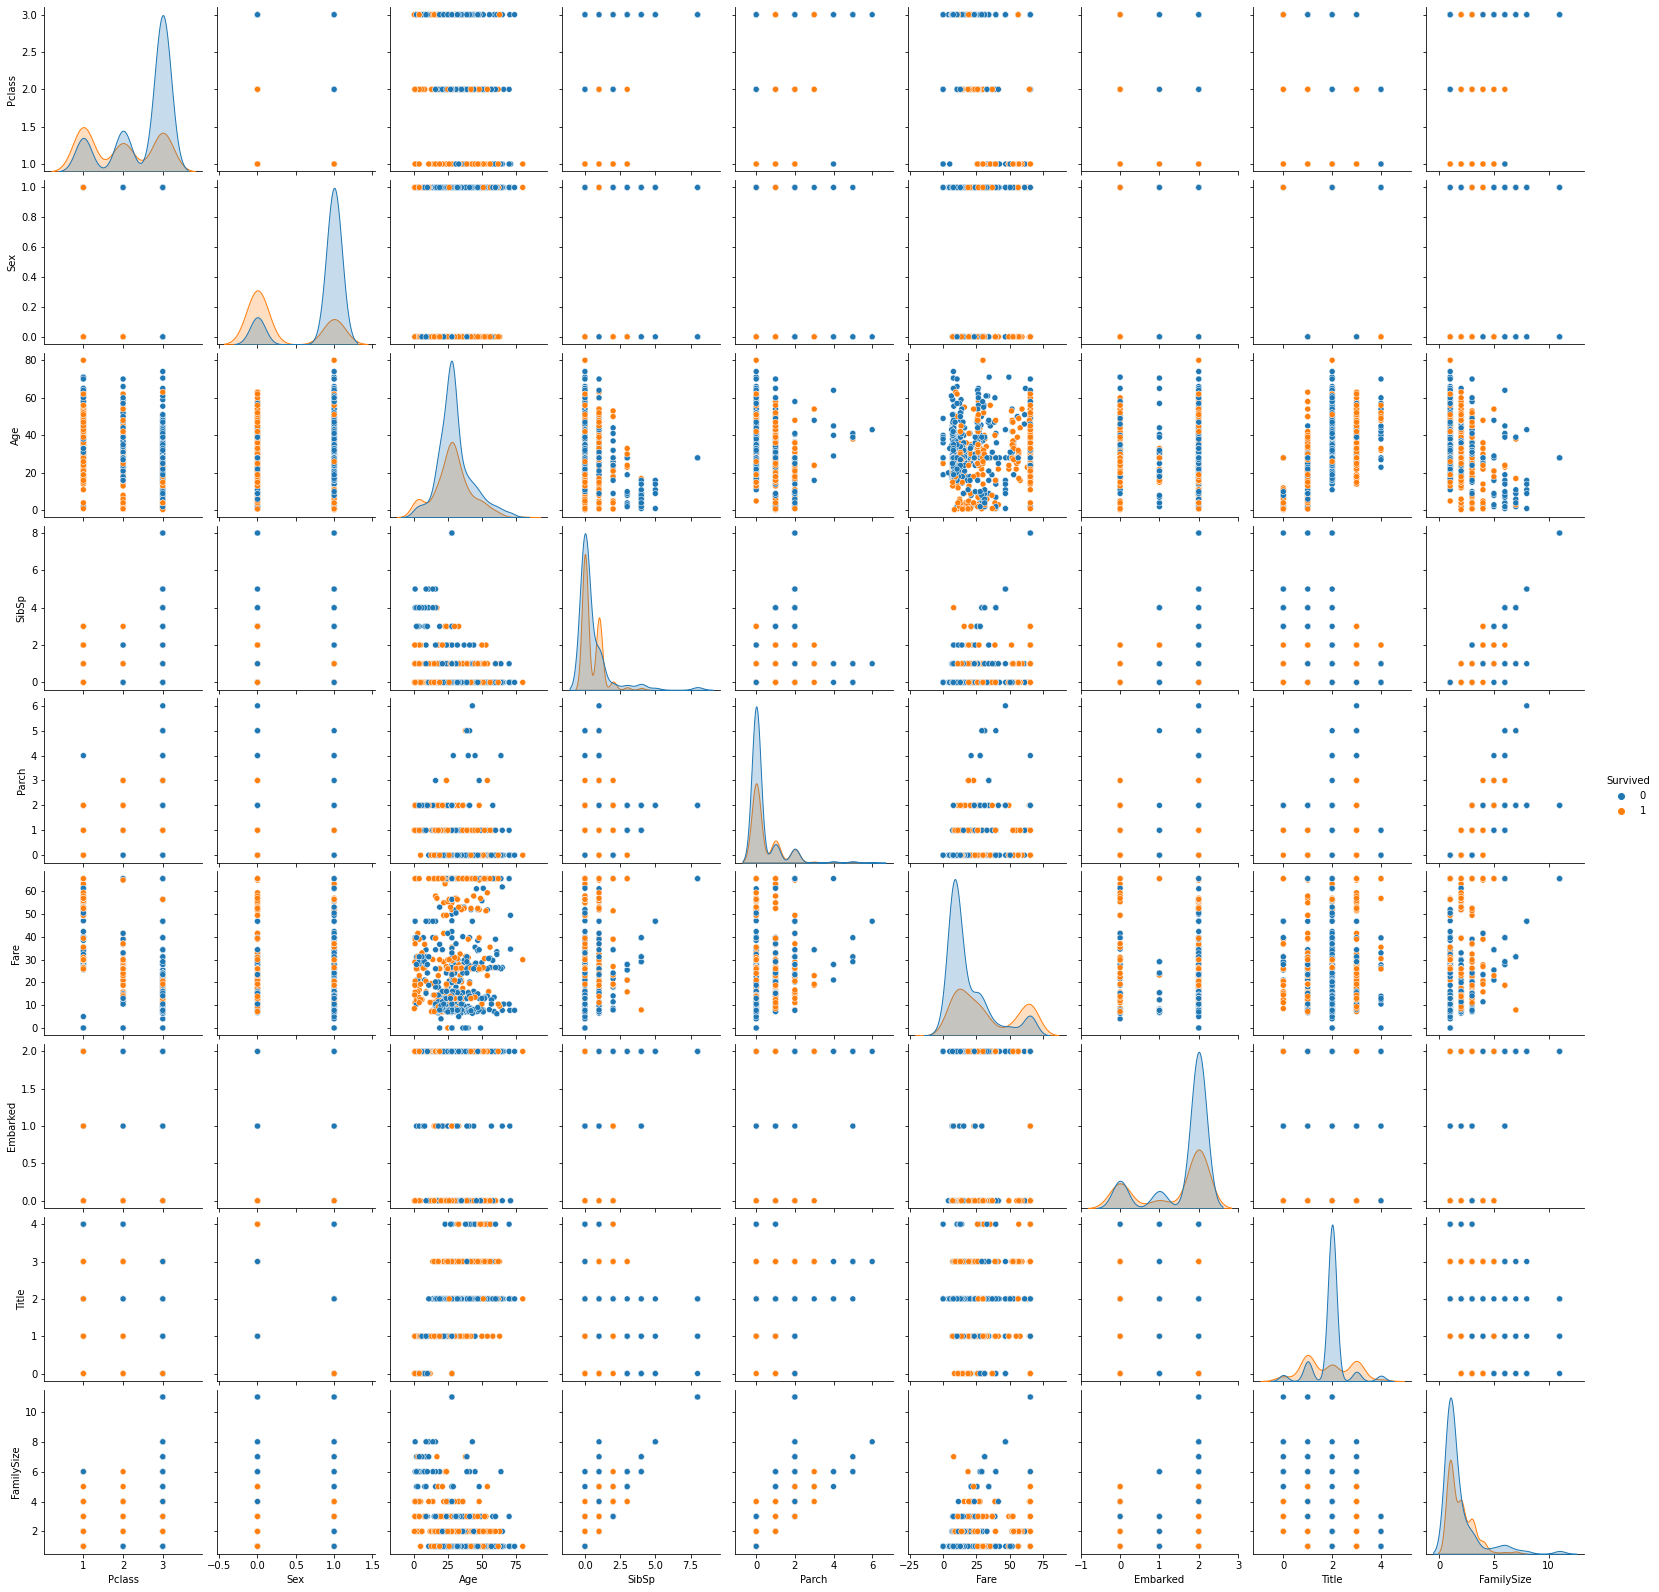

In [40]:
# Creating a pairplot to find the distribution of data 
# and to analyse which model to use
sns.pairplot(df,hue='Survived')

In [41]:
# since there are so much overlapping in the data, we cant use linear regression
# bcoz it will give us errors and will be less accurate

In [42]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [47]:
#knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
score_knn = knn.score(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'knn score: {score_knn}')  

knn score: 0.7945425361155698


In [68]:
#SVM
svc = SVC()
svc.fit(X_train, y_train)
score_svc = svc.score(X_train, y_train)
out_svc = svc.predict(X_test)    
print(f'SVM score: {score_svc}') 

SVM score: 0.7255216693418941


K fold cross validation

In [60]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,X,y,cv=10)
score

array([0.63333333, 0.6741573 , 0.68539326, 0.70786517, 0.73033708,
       0.7752809 , 0.78651685, 0.74157303, 0.73033708, 0.76404494])

In [61]:
score.mean()

0.7228838951310862

In [69]:
score=cross_val_score(svc,X,y,cv=10)
score

array([0.58888889, 0.61797753, 0.70786517, 0.7752809 , 0.68539326,
       0.71910112, 0.74157303, 0.75280899, 0.76404494, 0.74157303])

In [70]:
score.mean()

0.7094506866416979

Stratified kfold crossvalidation

In [62]:
X.shape,y.shape

((891, 9), (891,))

In [64]:
from sklearn.model_selection import StratifiedKFold

In [65]:
accuracy=[]
skf=StratifiedKFold(n_splits=5,random_state=None)
skf.get_n_splits(X,y)

5

In [66]:
for train_index, test_index in skf.split(X,y):
  print("Train: ",train_index, "Validation: ",test_index)
  X1_train, X1_test=X.iloc[train_index], X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index], y.iloc[test_index]

  knn.fit(X1_train,y1_train)
  prediction=knn.predict(X1_test)
  score=accuracy_score(prediction,y1_test)
  accuracy.append(score)
  print(accuracy)

Train:  [168 169 170 171 173 174 175 176 177 178 179 180 181 182 185 188 189 191
 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 42

In [67]:
np.array(accuracy).mean()

0.7060071558596447

In [71]:
for train_index, test_index in skf.split(X,y):
  print("Train: ",train_index, "Validation: ",test_index)
  X1_train, X1_test=X.iloc[train_index], X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index], y.iloc[test_index]

  svc.fit(X1_train,y1_train)
  prediction=svc.predict(X1_test)
  score=accuracy_score(prediction,y1_test)
  accuracy.append(score)
  print(accuracy)

Train:  [168 169 170 171 173 174 175 176 177 178 179 180 181 182 185 188 189 191
 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 42

In [72]:
np.array(accuracy).mean()

0.7071652752495136